<a href="https://colab.research.google.com/github/Martinccv/Clases-DS/blob/main/Clase37_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

Vamos a trabajar con el método K-means y evaluaremos las métricas vistas en la teoría.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Para empezar, vamos a generarnos una serie de datasets sintéticos con las funciones que ya vienen incorporadas en Scikit-learn. Notemos que estos datos vienen con una etiqueta asociada donde nos indica a qué cluster pertenecen. La idea será utilizar los métodos de clusting estudiados para poder identificar los clusters sin conocer esta etiqueta.

In [2]:
from sklearn.datasets import make_blobs, make_moons

X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

Grafiquemos los datasets para ver las diferencias entre cada uno.

In [3]:
y1

array([3, 0, 3, 2, 1, 0, 0, 1, 0, 0, 3, 1, 2, 3, 1, 2, 2, 3, 0, 1, 0, 3,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 3, 2, 3, 0, 3, 0, 2, 2, 0, 0, 0, 2,
       3, 0, 0, 3, 2, 0, 1, 0, 0, 2, 3, 1, 0, 0, 3, 3, 1, 1, 2, 2, 2, 3,
       0, 2, 3, 3, 3, 3, 3, 2, 0, 3, 0, 3, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 3, 2, 1,
       0, 0, 2, 3, 2, 2, 0, 2, 1, 1, 1, 3, 2, 2, 0, 1, 0, 3, 2, 1, 1, 0,
       2, 0, 0, 0, 2, 0, 1, 3, 1, 3, 1, 0, 3, 3, 1, 0, 3, 3, 1, 0, 0, 0,
       2, 0, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 3, 3, 0, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 3, 2, 0, 1, 1, 2, 3, 2, 3,
       2, 2, 2, 0, 3, 3, 1, 1, 2, 0, 3, 0, 3, 2, 0, 3, 2, 0, 0, 1, 1, 3,
       0, 0, 0, 3, 0, 0, 0, 2, 3, 3, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2,
       1, 1, 3, 3, 3, 3, 3, 3, 0, 2, 3, 2, 2, 1, 2, 0, 3, 0, 1, 3, 0, 1,
       3, 2, 0, 2, 3, 1, 1, 0, 1, 2, 3, 3, 2, 3, 2, 0, 1, 3, 2, 0, 2, 2,
       2, 0, 2, 3, 1, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1,

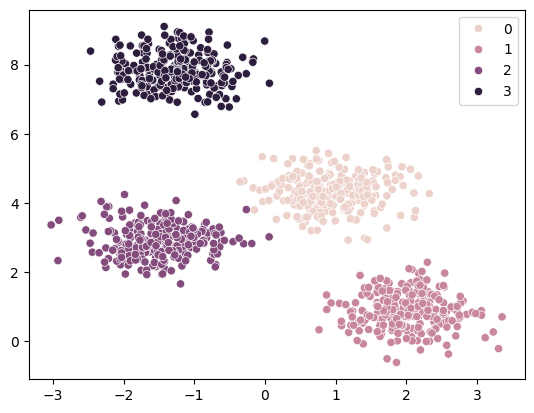

In [4]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1)
plt.show()

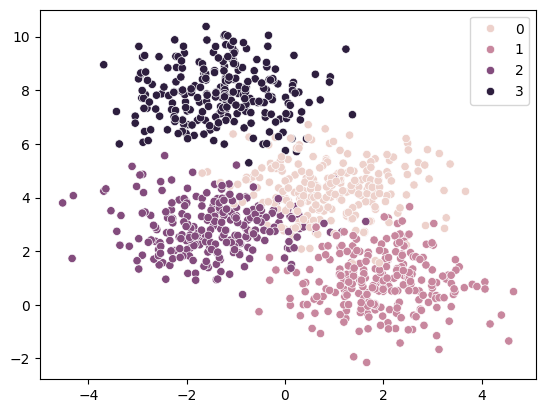

In [5]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.show()

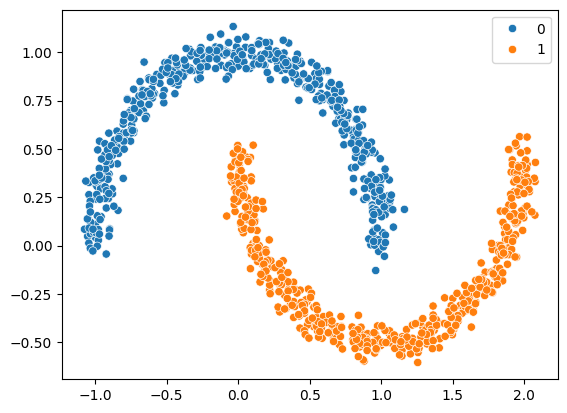

In [6]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3)
plt.show()

A simple vista, ¿Creen que K means es capaz de identificar correctamente los clusters en los 3 casos?

## K-means

Scikit-Learn tiene una implementación del método que vimos en la clase llamada KMeans.

1. Leer la documentación, siempre debería ser el primer paso. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

2. Definimos los 3 modelos para los distintos datasets. Definir los parámetros n_clusters (según corresponda en cada caso basándose en los 3 gráficos de arriba) y un random_state=0 para que todos obtengamos resultados similares.

In [7]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X1)
kmeans_2 = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X2)
kmeans_3 = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X3)

Entrenamos los modelos con los datos. En este paso hay una diferencia importante con lo que veníamos haciendo en aprendizaje supervisado. ¿Cuál es?

In [8]:
kmeans_1.predict(X1)
kmeans_2.predict(X2)
kmeans_3.predict(X3)

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

Luego de entrenar los modelos, podemos consultar las etiquetas que se le asignó a cada instancia y el lugar de los centroides.

In [9]:
etiquetas_1 = kmeans_1.labels_
print(etiquetas_1.shape)

(1000,)


In [10]:
np.unique(etiquetas_1)

array([0, 1, 2, 3], dtype=int32)

Centroides:

In [11]:
centros_1 = kmeans_1.cluster_centers_
print(centros_1)

[[-1.27283855  7.84651464]
 [ 2.01942692  0.87474842]
 [-1.49807428  2.90164881]
 [ 0.92917513  4.29023124]]


Completar la siguiente celda:

In [12]:
etiquetas_2 = kmeans_2.labels_
centros_2 = kmeans_2.cluster_centers_#COMPLETAR
etiquetas_3 = kmeans_3.labels_#COMPLETAR
centros_3 = kmeans_3.cluster_centers_#COMPLETAR

Ploteamos los resultados para todos los datasets. ¿Les parece que la separación fue adecuada?

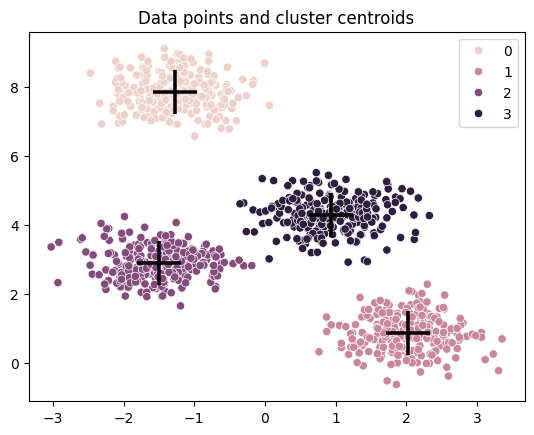

In [13]:
sns.scatterplot(x=X1[:, 0], y=X1[:, -1], hue = etiquetas_1) # Noten que aca pasamos las etiquetas del CLUSTERING (no las originales)
sns.scatterplot(x=centros_1[:, 0], y=centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

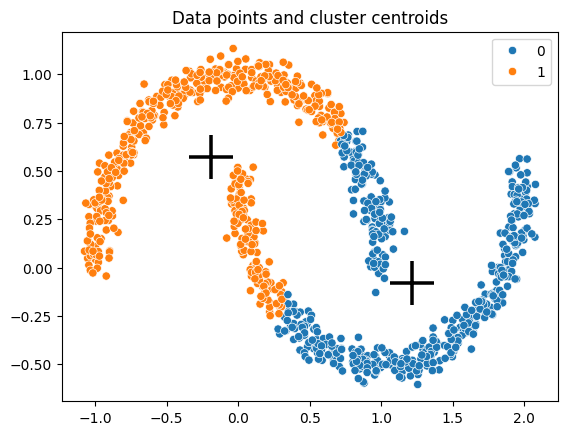

In [14]:
sns.scatterplot(x=X3[:, 0], y=X3[:, -1], hue = etiquetas_3)
sns.scatterplot(x=centros_3[:, 0], y=centros_3[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

¿ Qué pasa si no elegimos correctamente el número de clusters ?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


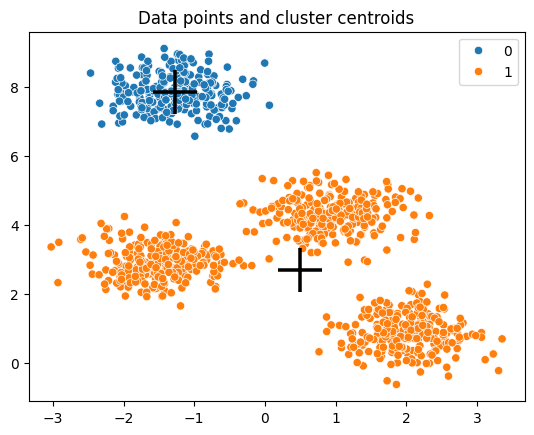

In [15]:
kmeans_1_mal = KMeans(n_clusters=2, random_state=0).fit(X1)
etiquetas_1_mal = kmeans_1_mal.labels_
centros = kmeans_1_mal.cluster_centers_


sns.scatterplot(x=X1[:, 0], y=X1[:, -1], hue = etiquetas_1_mal) # Noten que aca pasamos las etiquetas del CLUSTERING (no las originales)
sns.scatterplot(x=centros[:, 0], y=centros[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


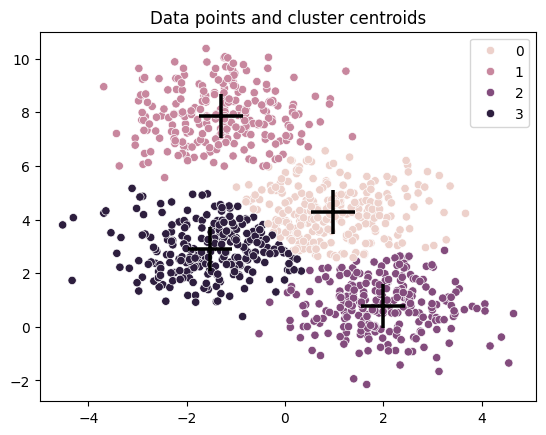

In [16]:
kmeans_2_ = KMeans(n_clusters=4, random_state=0).fit(X2)
etiquetas_2_ = kmeans_2_.labels_
centros = kmeans_2_.cluster_centers_


sns.scatterplot(x=X2[:, 0], y=X2[:, -1], hue = etiquetas_2_)
sns.scatterplot(x=centros[:, 0], y=centros[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

# Inercia

Vamos a evaluar las particiones que realizamos mediante KMeans usando la inercia. La idea es que al variar el número de clúster K en el modelo, el valor de la distancia media de los datos al centroide más cercano va a variar. Queremos graficar esa curva para elegir el número de particiones óptimos con el metodo del codo.

Uno de los atributos de kmeans en sklearn es inertia (pueden ver la doc):

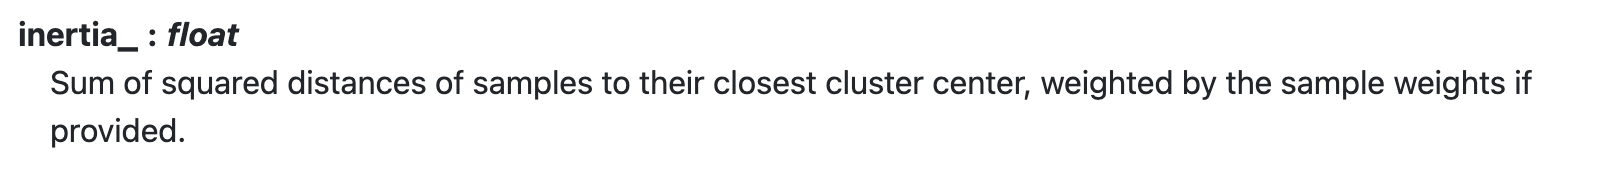

Utilizando este atributo:

- Aplicar a el dataset 1 (X1) Kmeans con distintos valores de K: de 2 a 12.
- En cada iteración almacenar el resultado de inertia_ en una lista con el nombre **lista_inercias**

In [17]:
K = np.arange(2,13)

In [18]:
lista_inercias = []

for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X1)
    lista_inercias.append(kmeans.inertia_)


print("Lista de inercias para cada K de 2 a 12:", lista_inercias)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Lista de inercias para cada K de 2 a 12: [3568.354422993807, 1451.9631080489285, 474.5630634519895, 433.5000006760789, 391.66744867402997, 352.47187776858334, 311.8582930028169, 284.16366775650215, 257.20317779472487, 229.9302182887196, 205.00719373970958]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ahora graficamos la inercia por cantidad de clusters:

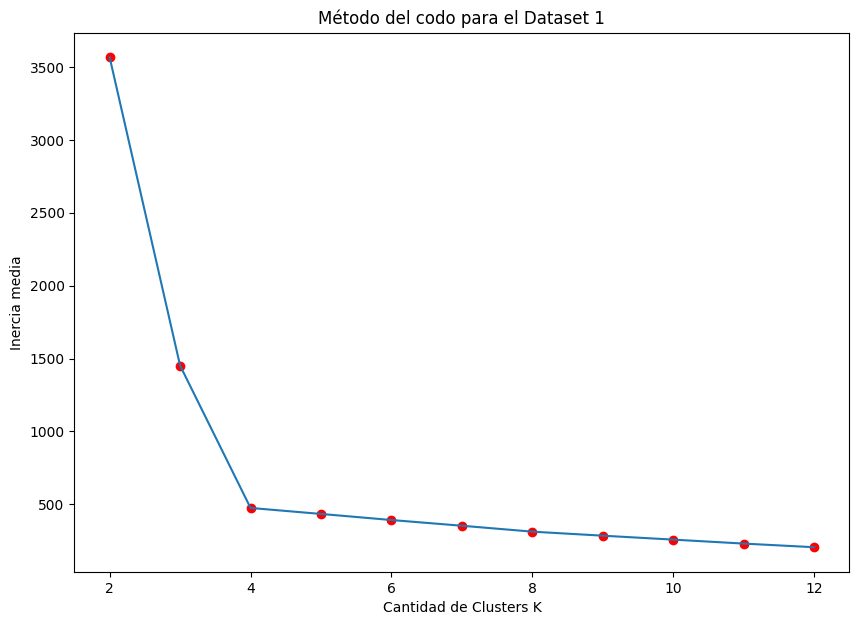

In [19]:
plt.figure(figsize = (10,7))
plt.plot(K,lista_inercias)
plt.scatter(K,lista_inercias,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()

¿Pueden ver el "codo"?

# Silhouette

Vamos a evaluar las particiones que realizamos mediante el valor de silhouette.

Vamos a calcular el valor de silhouette promedio para distintos valores de K. La manera de hacerlo es igual a la que usamos para calcular los valores de inercia, vamos a recorrer con un for los distintos modelos e ir agregando a una lista los valores. Esta vez, en lugar de calcular la inercia, vamos a calcular el valor de silhouette usando la función silhouette_score.


Importar silhouette_score

In [20]:
from sklearn.metrics import silhouette_score
lista_silhouette_scores = []

for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X1)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X1, cluster_labels)
    lista_silhouette_scores.append(silhouette_avg)


print("Lista de valores de silhouette promedio para cada K de 2 a 12:", lista_silhouette_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Lista de valores de silhouette promedio para cada K de 2 a 12: [0.5874173200871528, 0.6438724743974136, 0.73176520081899, 0.62111132512734, 0.5216987530057878, 0.3986098223224324, 0.32288633184790627, 0.33341375202117174, 0.3400259874019873, 0.34461578101944457, 0.3500540671646614]


Ahora, de la misma forma que hicimos con el método del codo, calcular el silhouette score para cada valor de k (entre 2 y 12) para el dataset X1 y plotear.

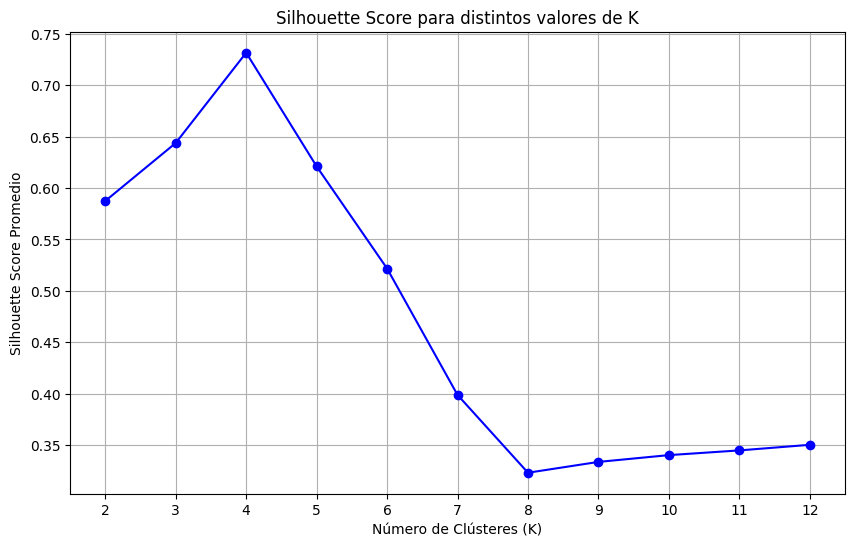

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 13), lista_silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score para distintos valores de K')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Silhouette Score Promedio')
plt.grid(True)
plt.xticks(range(2, 13))
plt.show()

# Desafío

Aplicando lo que aprendimos hoy, segmentar el siguiente dataset:

In [30]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mEzq69qMsTkPt-ciGAFYmhMF2jt2q0k5' -O users.csv

--2024-07-25 11:18:32--  https://docs.google.com/uc?export=download&id=1mEzq69qMsTkPt-ciGAFYmhMF2jt2q0k5
Resolving docs.google.com (docs.google.com)... 74.125.196.139, 74.125.196.113, 74.125.196.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.196.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1mEzq69qMsTkPt-ciGAFYmhMF2jt2q0k5&export=download [following]
--2024-07-25 11:18:32--  https://drive.usercontent.google.com/download?id=1mEzq69qMsTkPt-ciGAFYmhMF2jt2q0k5&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.139.132, 2607:f8b0:400c:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.139.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220188 (215K) [application/octet-stream]
Saving to: ‘users.csv’

users.csv           100%[===================>] 215.03K  --.-KB/s    in 0.00

In [31]:
import pandas as pd

df = pd.read_csv("https://docs.google.com/uc?export=download&id=1mEzq69qMsTkPt-ciGAFYmhMF2jt2q0k5", sep='\t')
df = df[["ID","Year_Birth", "Education", "Marital_Status", "Income", "Kidhome", "Teenhome",
              "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
              "MntSweetProducts", "NumWebPurchases"]]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,8
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,1
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,8
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,2
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,5


In [39]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,8
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,1
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,8
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,2
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,5


In [37]:
df.shape

(2240, 14)

- Year_Birth: Customer's birth year
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Recency: Number of days since customer's last purchase
- MntWines Amount spent on wine
- MntFruits: Amount spent on fruits

...


In [38]:
df_clean = df.dropna()
df_clean.shape

(2216, 14)

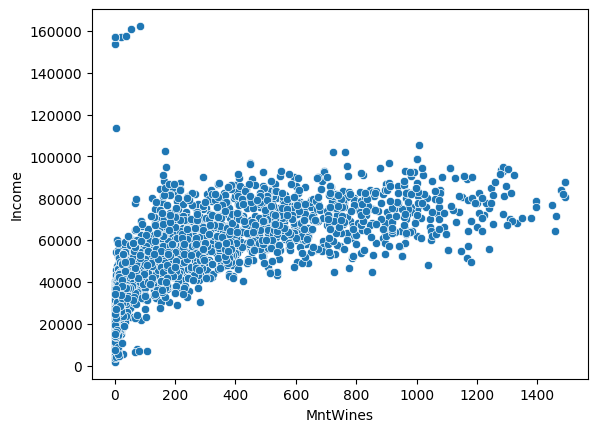

In [44]:
sns.scatterplot(y = df_clean["Income"], x = df_clean["MntWines"])
plt.show()

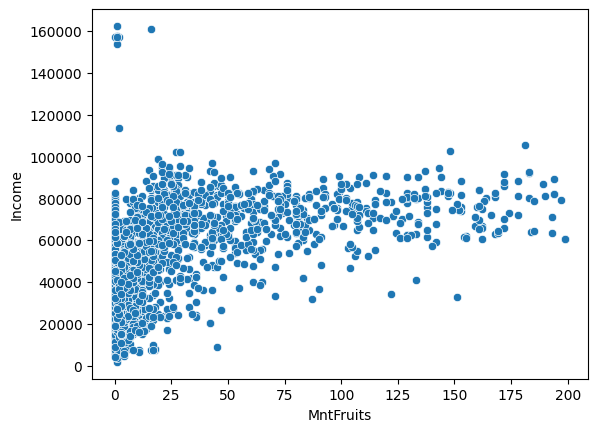

In [43]:
sns.scatterplot(y = df_clean["Income"], x = df_clean["MntFruits"])
plt.show()

A tener en cuenta: En K means es importante escalar los datos.

In [42]:
df_clean = df_clean[df_clean["Income"] <= 200000]

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean[["Income", "MntWines"]] = scaler.fit_transform(df_clean[["Income", "MntWines"]])

In [54]:
df_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases
0,5524,1957,Graduation,Single,0.286604,0,0,58,0.977779,88,546,172,88,8
1,2174,1954,Graduation,Single,-0.261407,1,1,38,-0.872375,1,6,2,1,1
2,4141,1965,Graduation,Together,0.912723,0,0,26,0.358096,49,127,111,21,8
3,6182,1984,Graduation,Together,-1.176680,1,0,26,-0.872375,4,20,10,3,2
4,5324,1981,PhD,Married,0.293806,1,0,94,-0.392047,43,118,46,27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,0.429949,0,1,46,1.197188,43,182,42,118,9
2236,4001,1946,PhD,Together,0.559634,2,1,56,0.298796,0,30,0,0,8
2237,7270,1981,Graduation,Divorced,0.232844,0,0,91,1.787221,48,217,32,12,2
2238,8235,1956,Master,Together,0.802694,0,1,8,0.364026,30,214,80,30,6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


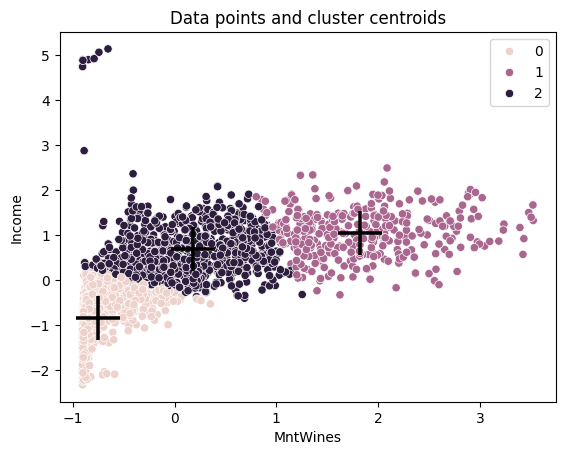

In [64]:
kmeans_df = KMeans(n_clusters=3, random_state=0).fit(df_clean[["Income", "MntWines"]])
etiquetas_df = kmeans_df.labels_
centros_df = kmeans_df.cluster_centers_


sns.scatterplot(x=df_clean["MntWines"], y=df_clean["Income"], hue=etiquetas_df)
sns.scatterplot(x=centros_df[:, 1], y=centros_df[:, 0],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

In [57]:
K = np.arange(2,13)

In [59]:
lista_inercias = []

for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_clean[["Income","MntWines"]])
    lista_inercias.append(kmeans.inertia_)


print("Lista de inercias para cada K de 2 a 12:", lista_inercias)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Lista de inercias para cada K de 2 a 12: [1648.3814697846267, 1048.8457721628038, 791.2785313007626, 654.0035714430321, 544.5755717720457, 445.9777916481081, 382.6567345926162, 331.7076805343774, 300.28594377103843, 269.8425997008853, 243.67358869583927]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


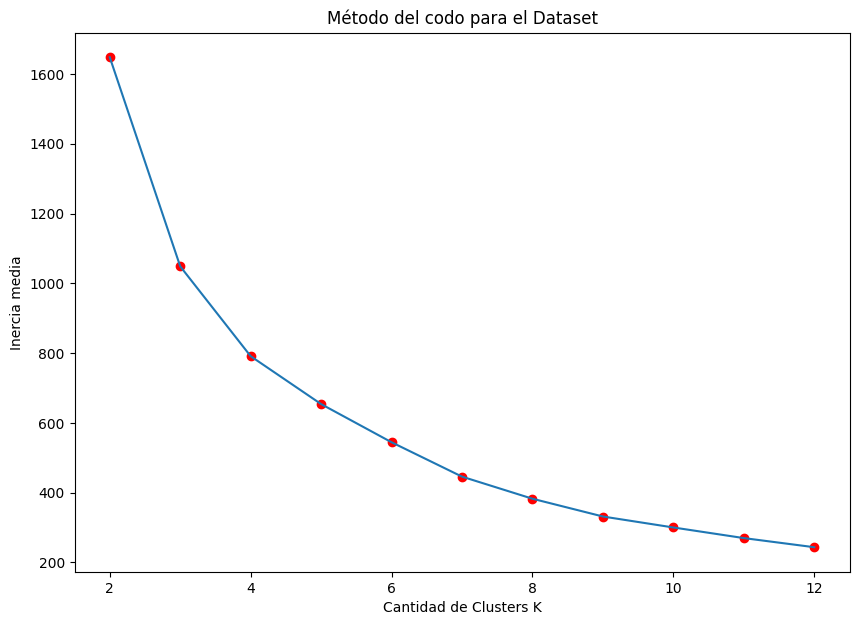

In [63]:
plt.figure(figsize = (10,7))
plt.plot(K,lista_inercias)
plt.scatter(K,lista_inercias,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset')

plt.show()

In [61]:
from sklearn.metrics import silhouette_score
lista_silhouette_scores = []

for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_clean[["Income","MntWines"]])
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_clean[["Income","MntWines"]], cluster_labels)
    lista_silhouette_scores.append(silhouette_avg)


print("Lista de valores de silhouette promedio para cada K de 2 a 12:", lista_silhouette_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Lista de valores de silhouette promedio para cada K de 2 a 12: [0.5552338910103973, 0.5029067763584878, 0.4268204972157955, 0.4174106855057803, 0.4002063790463339, 0.3987925224537984, 0.3988131178111315, 0.4014303624108595, 0.4005314614333297, 0.390733423690964, 0.37315573371284416]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


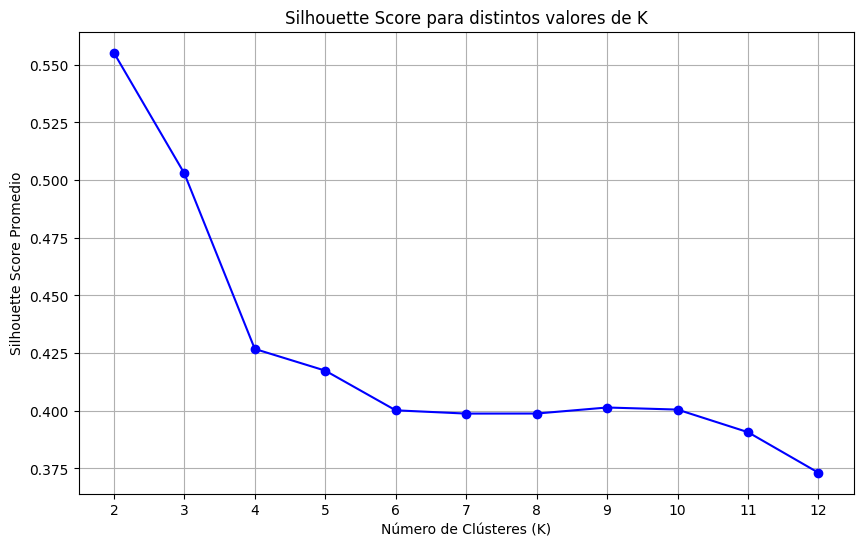

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 13), lista_silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score para distintos valores de K')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Silhouette Score Promedio')
plt.grid(True)
plt.xticks(range(2, 13))
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean[["MntFruits"]] = scaler.fit_transform(df_clean[["MntFruits"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


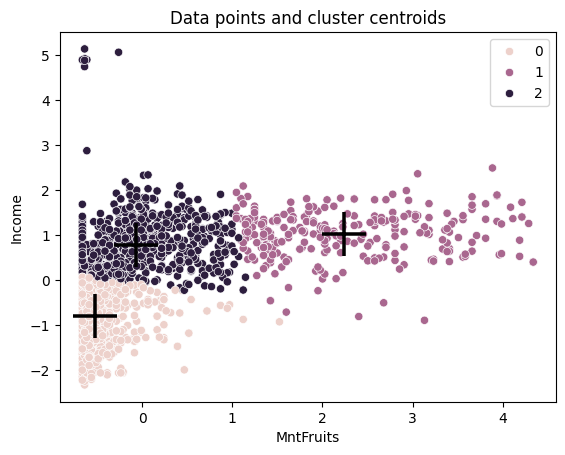

In [66]:
kmeans_df2 = KMeans(n_clusters=3, random_state=0).fit(df_clean[["Income", "MntFruits"]])
etiquetas_df2 = kmeans_df2.labels_
centros_df2 = kmeans_df2.cluster_centers_


sns.scatterplot(x=df_clean["MntFruits"], y=df_clean["Income"], hue=etiquetas_df2)
sns.scatterplot(x=centros_df2[:, 1], y=centros_df2[:, 0],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

In [67]:
lista_inercias2 = []

for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_clean[["Income","MntFruits"]])
    lista_inercias2.append(kmeans.inertia_)


print("Lista de inercias para cada K de 2 a 12:", lista_inercias2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Lista de inercias para cada K de 2 a 12: [2083.354833954097, 1164.4522456032737, 854.5637311936221, 677.8073542813847, 567.6923322153564, 471.0035478351483, 396.9213800433515, 350.1120137899121, 311.6641283402148, 283.77363517982747, 262.1363848813809]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


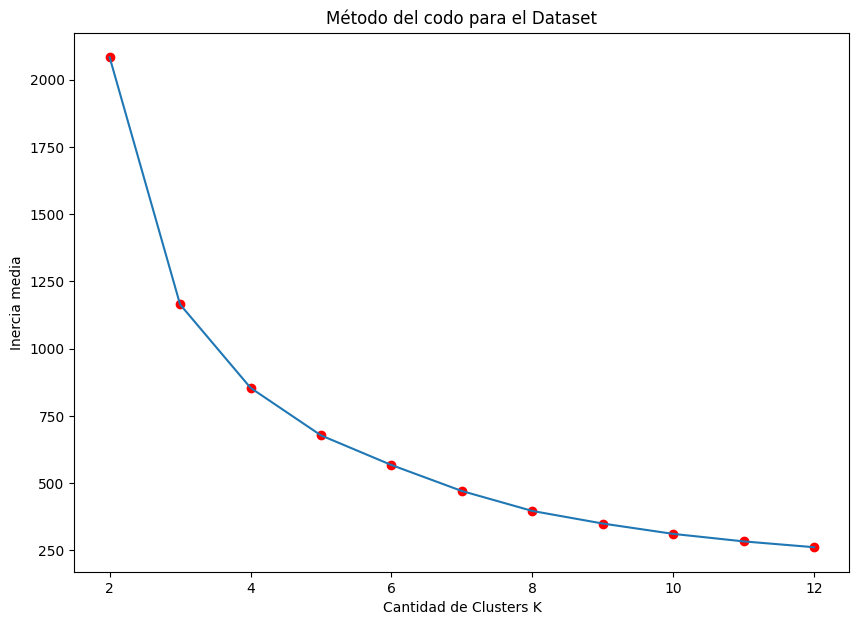

In [68]:
plt.figure(figsize = (10,7))
plt.plot(K,lista_inercias2)
plt.scatter(K,lista_inercias2,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset')

plt.show()

In [69]:
from sklearn.metrics import silhouette_score
lista_silhouette_scores2 = []

for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_clean[["Income","MntFruits"]])
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_clean[["Income","MntFruits"]], cluster_labels)
    lista_silhouette_scores2.append(silhouette_avg)


print("Lista de valores de silhouette promedio para cada K de 2 a 12:", lista_silhouette_scores2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Lista de valores de silhouette promedio para cada K de 2 a 12: [0.5225567701282279, 0.5021242467178637, 0.44264652657281145, 0.4377682312497728, 0.40787989912947453, 0.41096126946770745, 0.4248080560416512, 0.40479995718421513, 0.40379549285099525, 0.39615238771885436, 0.37707032540544333]


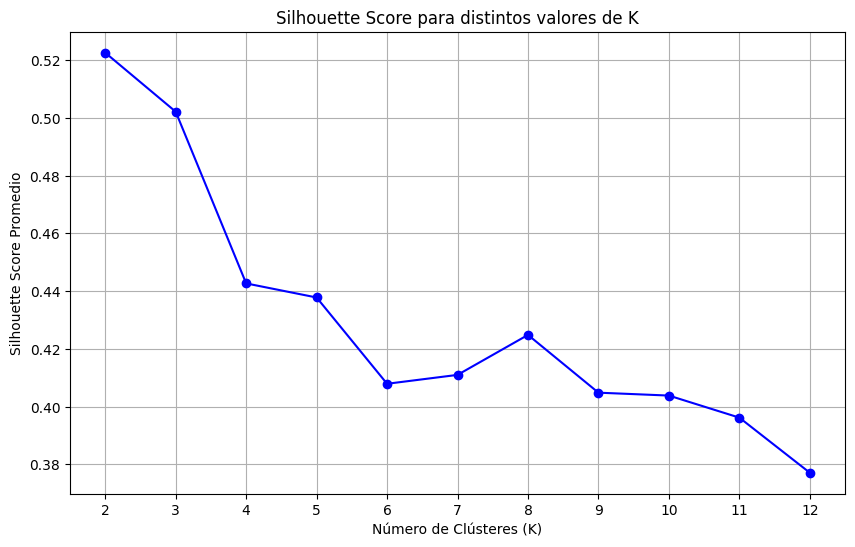

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 13), lista_silhouette_scores2, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score para distintos valores de K')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Silhouette Score Promedio')
plt.grid(True)
plt.xticks(range(2, 13))
plt.show()